In [1]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
from typing import List,Tuple

from pandas import Categorical
from pandas.api.types import CategoricalDtype
import numpy as np
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("results.csv")
df['LAS'] = df['LAS'].astype('float') 

In [23]:
grouped_df = df.groupby(["collection", "morph", "experiment", "model", "source"]).mean()
grouped_df= grouped_df.reset_index()
grouped_df.head()

,collection,morph,experiment,model,source,Column1,split,LAS
0,edt,am,1.0,malt,test,130.0,4.5,0.8422
1,edt,am,1.0,malt,train,129.0,4.5,0.9490
2,edt,am,1.0,udpipe,test,90.0,4.5,0.8425
3,edt,am,1.0,udpipe,train,89.0,4.5,0.9060
4,edt,am,2.0,malt,test,290.0,4.5,0.8376


In [62]:
df_new = pd.DataFrame(columns=['collection', 'morph', 'experiment', 'model', 'source', 'split', 'LAS'])
for row in df.iterrows():
    row = row[1]
    collection = row[0]
    experiment = row[1]
    model = row[2]
    source = row[3]
    split = row[4]
    las = row[5]
    morph = 'gm' if 'gm' in experiment else 'am'
    experiment = float('.'.join(experiment.split('_')[2:]))
    df_new  = df_new.append({'collection':collection, 'morph':morph, 'experiment':experiment, 'model':model, 'source':source, 'split':split, 'LAS':las}, ignore_index=True)

In [98]:
df_new.to_csv("results.csv")

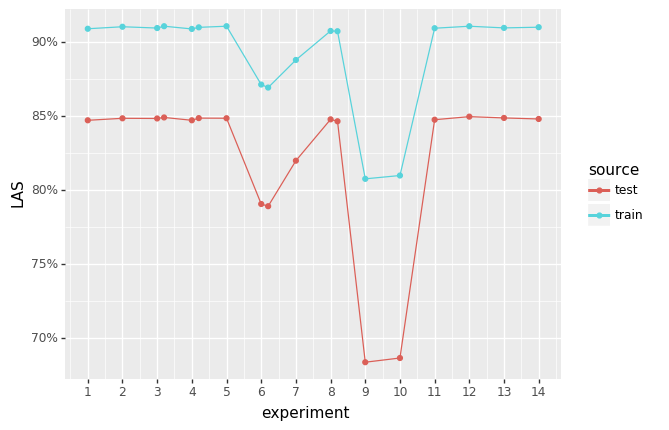

<ggplot: (-9223371853142940377)>

In [14]:
df_u = grouped_df.loc[(grouped_df['model']=='udpipe') & (grouped_df['collection']=='edt') & (grouped_df['morph']=='gm')]
p = ggplot(df_u)
p = p + geom_point(aes(x='experiment', y = 'LAS', color='source'))
p = p + geom_line(aes(x='experiment', y = 'LAS', color='source'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_udpipe_gm.pdf")

display(p)

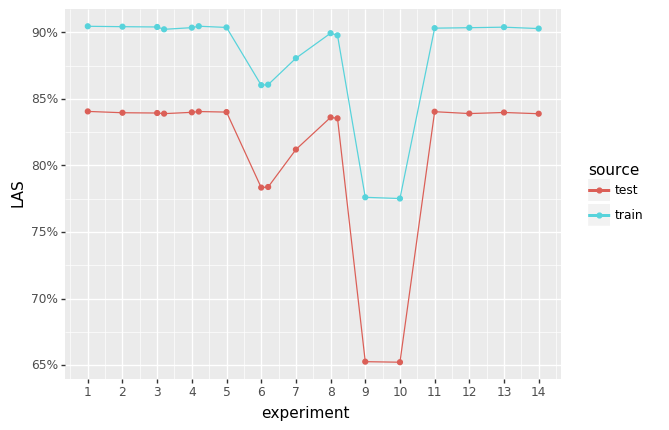

<ggplot: (-9223371853142987765)>

In [15]:
df_u = grouped_df.loc[(grouped_df['model']=='udpipe') & (grouped_df['collection']=='est_ud') & (grouped_df['morph']=='gm')]
p = ggplot(df_u)
p = p + geom_point(aes(x='experiment', y = 'LAS', color='source'))
p = p + geom_line(aes(x='experiment', y = 'LAS', color='source'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_udpipe_gm.pdf")

display(p)

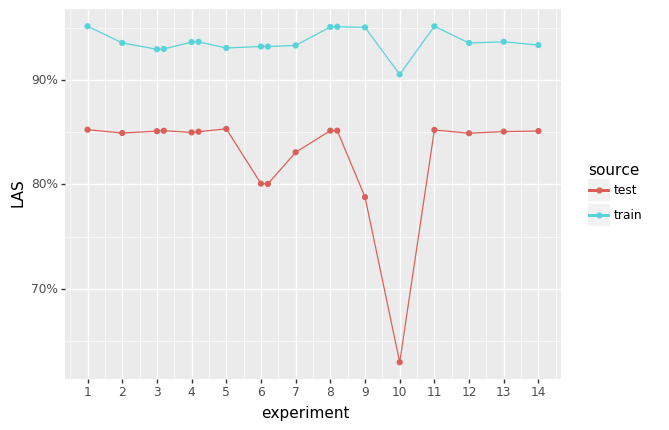

<ggplot: (183711935019)>

In [16]:
df_m = grouped_df.loc[(grouped_df['model']=='malt') & (grouped_df['collection']=='edt') & (grouped_df['morph']=='gm')]
p = ggplot(df_m)
p = p + geom_point(aes(x='experiment', y = 'LAS', color='source'))
p = p + geom_line(aes(x='experiment', y = 'LAS', color='source'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_malt_gm.pdf")

display(p)

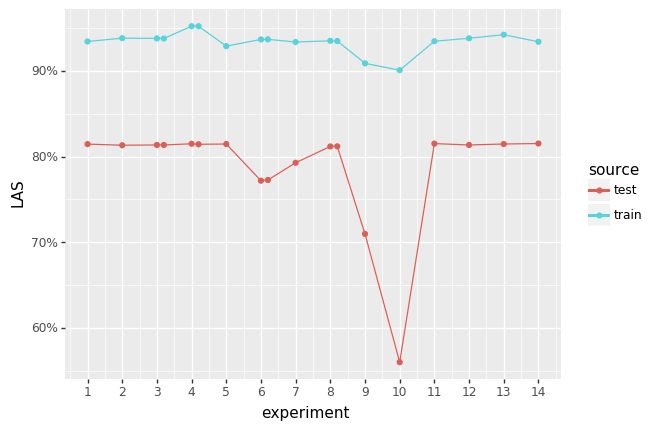

<ggplot: (-9223371853144417080)>

In [17]:
df_m = grouped_df.loc[(grouped_df['model']=='malt') & (grouped_df['collection']=='est_ud') & (grouped_df['morph']=='gm')]
p = ggplot(df_m)
p = p + geom_point(aes(x='experiment', y = 'LAS', color='source'))
p = p + geom_line(aes(x='experiment', y = 'LAS', color='source'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_malt_gm.pdf")
display(p)

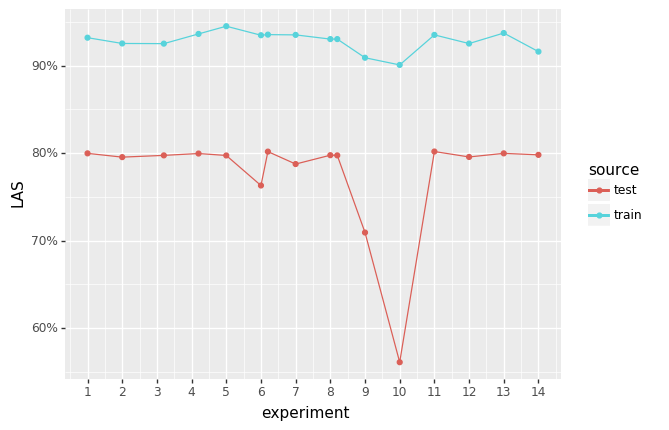

<ggplot: (183711951287)>

In [18]:
df_mm = grouped_df.loc[(grouped_df['model']=='malt') & (grouped_df['collection']=='est_ud') & (grouped_df['morph']=='am')]
p = ggplot(df_mm)
p = p + geom_point(aes(x='experiment', y = 'LAS', color='source'))
p = p + geom_line(aes(x='experiment', y = 'LAS', color='source'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_malt_am.pdf")

display(p)

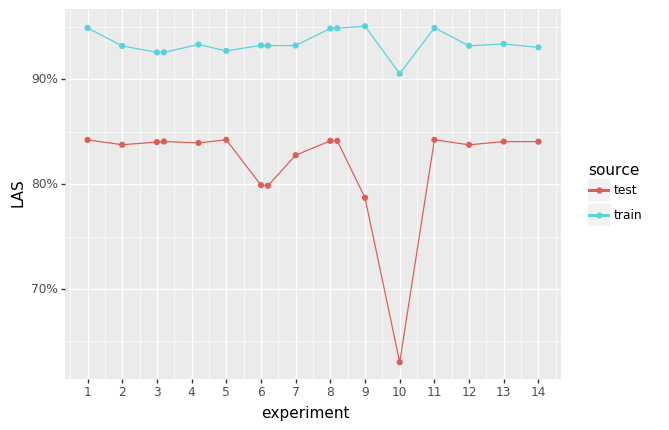

<ggplot: (183710318042)>

In [19]:
df_mm = grouped_df.loc[(grouped_df['model']=='malt') & (grouped_df['collection']=='edt') & (grouped_df['morph']=='am')]
p = ggplot(df_mm)
p = p + geom_point(aes(x='experiment', y = 'LAS', color='source'))
p = p + geom_line(aes(x='experiment', y = 'LAS', color='source'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_malt_am.pdf")
#p = p + coord_fixed(ratio=20.5, xlim = (1,14))

display(p)

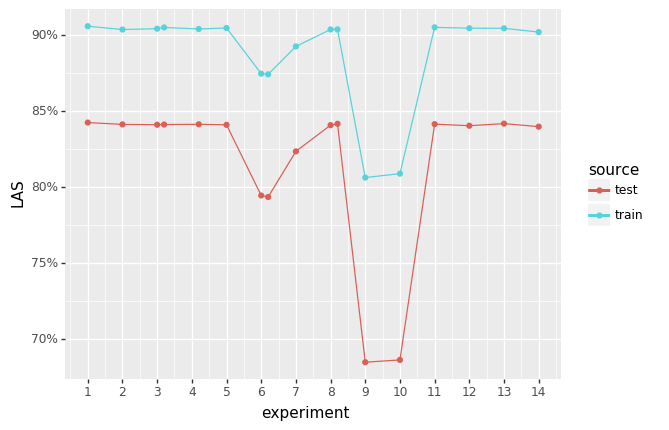

<ggplot: (183710386920)>

In [36]:
df_um = grouped_df.loc[(grouped_df['model']=='udpipe') & (grouped_df['collection']=='edt') & (grouped_df['morph']=='am')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'LAS', color='source'))
p = p + geom_line(aes(x='experiment', y = 'LAS', color='source'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_udpipe_am.pdf")

display(p)

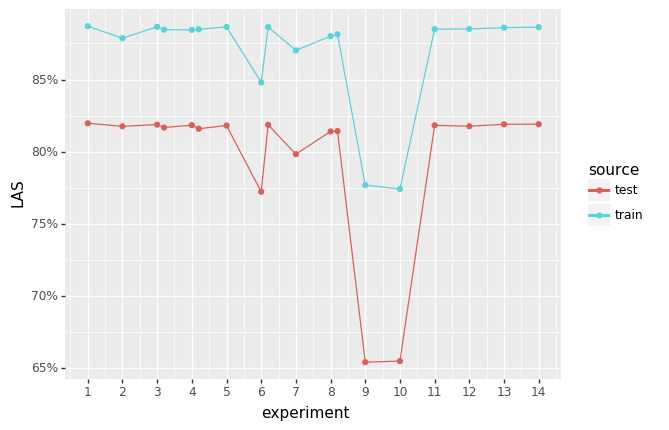

<ggplot: (-9223371853142618287)>

In [24]:
df_um = grouped_df.loc[(grouped_df['model']=='udpipe') & (grouped_df['collection']=='est_ud') & (grouped_df['morph']=='am')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'LAS', color='source'))
p = p + geom_line(aes(x='experiment', y = 'LAS', color='source'))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_udpipe_am.pdf")

display(p)

In [27]:
tmp =(df
      
      .assign(group = lambda df: pd.cut(df['split'], bins = [-1,10]))
     )

display(tmp.head())

sdf = (tmp
       .groupby(['experiment', 'collection','model', 'morph','source', 'group'])
       .aggregate(  size_mean=('experiment', np.mean), 
                  size_std=('experiment', np.std),
                  accuracy_mean=('LAS', np.mean), 
                  accuracy_std=('LAS', np.std))
       .reset_index()
       .assign(accuracy_ue = lambda df: df['accuracy_mean'] + 2 * df['accuracy_std'],
               accuracy_le = lambda df: df['accuracy_mean'] - 2 * df['accuracy_std']))
display(sdf.head())

,Column1,collection,morph,experiment,model,source,split,LAS,group
0,0,edt,gm,1.0,udpipe,train,0,0.9090,"(-1, 10]"
1,1,edt,gm,1.0,udpipe,test,0,0.8420,"(-1, 10]"
2,2,edt,gm,1.0,udpipe,train,1,0.9118,"(-1, 10]"
3,3,edt,gm,1.0,udpipe,test,1,0.8498,"(-1, 10]"
4,4,edt,gm,1.0,udpipe,train,2,0.9070,"(-1, 10]"


,experiment,collection,model,morph,source,group,size_mean,size_std,accuracy_mean,accuracy_std,accuracy_ue,accuracy_le
0,1.0,edt,malt,am,test,"(-1, 10]",1.0,0.0,0.8422,0.006795,0.855791,0.828609
1,1.0,edt,malt,am,train,"(-1, 10]",1.0,0.0,0.9490,0.000471,0.949943,0.948057
2,1.0,edt,malt,gm,test,"(-1, 10]",1.0,0.0,0.8524,0.004993,0.862387,0.842413
3,1.0,edt,malt,gm,train,"(-1, 10]",1.0,0.0,0.9516,0.000516,0.952633,0.950567
4,1.0,edt,udpipe,am,test,"(-1, 10]",1.0,0.0,0.8425,0.006999,0.856497,0.828503


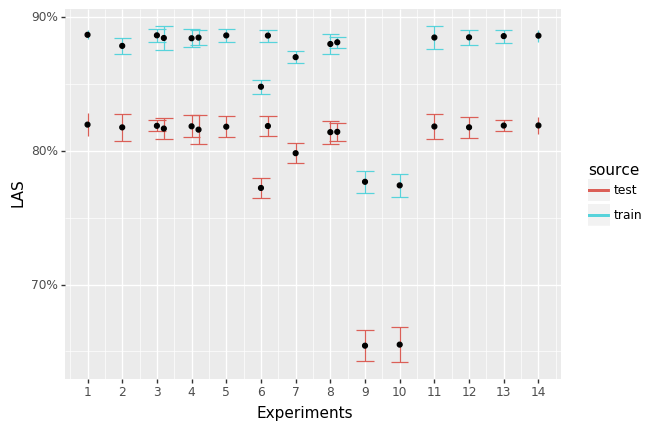

<ggplot: (-9223371853142500783)>

In [28]:
p = ggplot(sdf.loc[(sdf['model']=='udpipe') & (sdf['collection']=='est_ud') & (sdf['morph']=='am')]) 
p = p + geom_errorbar(aes(x = 'size_mean', ymin = 'accuracy_ue', ymax = 'accuracy_le', group='source',color='source'))
p = p + geom_point(aes(x='size_mean', y='accuracy_mean', group='source'))
p = p + scale_y_continuous(name='LAS', labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(name = 'Experiments', limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_udpipe_am_error.pdf")
p

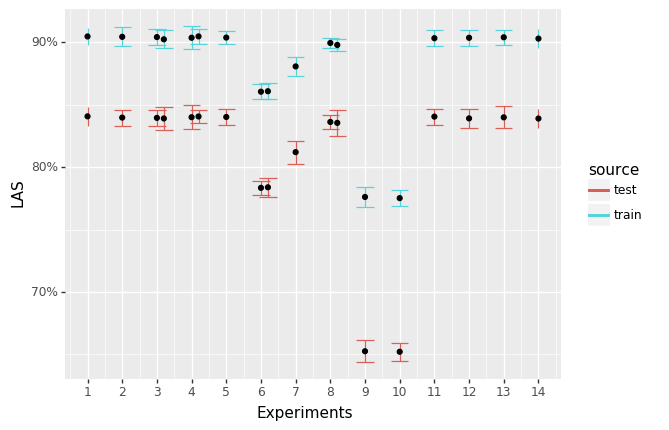

<ggplot: (-9223371853144419012)>

In [29]:
p = ggplot(sdf.loc[(sdf['model']=='udpipe') & (sdf['collection']=='est_ud') & (sdf['morph']=='gm')]) 
p = p + geom_errorbar(aes(x = 'size_mean', ymin = 'accuracy_ue', ymax = 'accuracy_le', group='source',color='source'))
p = p + geom_point(aes(x='size_mean', y='accuracy_mean', group='source'))
p = p + scale_y_continuous(name='LAS', labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(name = 'Experiments', limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_udpipe_gm_error.pdf")
p

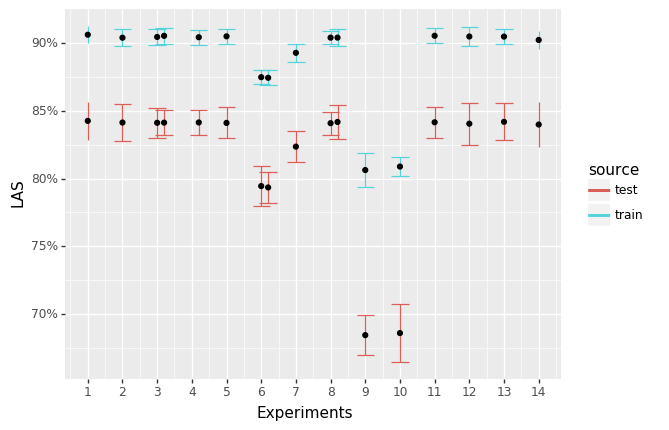

<ggplot: (183710334265)>

In [30]:
p = ggplot(sdf.loc[(sdf['model']=='udpipe') & (sdf['collection']=='edt') & (sdf['morph']=='am')]) 
p = p + geom_errorbar(aes(x = 'size_mean', ymin = 'accuracy_ue', ymax = 'accuracy_le', group='source',color='source'))
p = p + geom_point(aes(x='size_mean', y='accuracy_mean', group='source'))
p = p + scale_y_continuous(name='LAS', labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(name = 'Experiments', limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_udpipe_am_error.pdf")
p

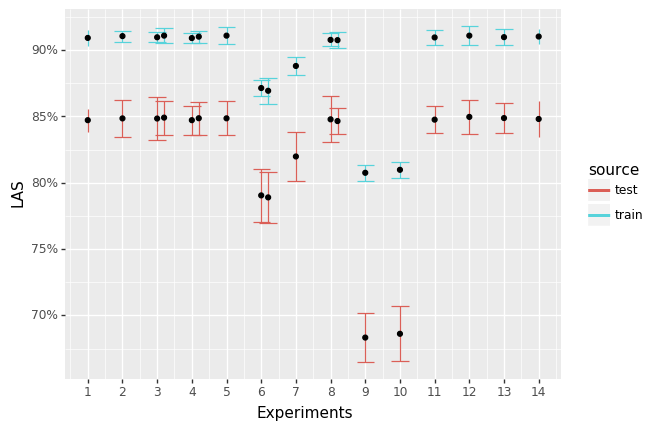

<ggplot: (183711791564)>

In [31]:
p = ggplot(sdf.loc[(sdf['model']=='udpipe') & (sdf['collection']=='edt') & (sdf['morph']=='gm')]) 
p = p + geom_errorbar(aes(x = 'size_mean', ymin = 'accuracy_ue', ymax = 'accuracy_le', group='source',color='source'))
p = p + geom_point(aes(x='size_mean', y='accuracy_mean', group='source'))
p = p + scale_y_continuous(name='LAS', labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(name = 'Experiments', limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_udpipe_gm_error.pdf")
p

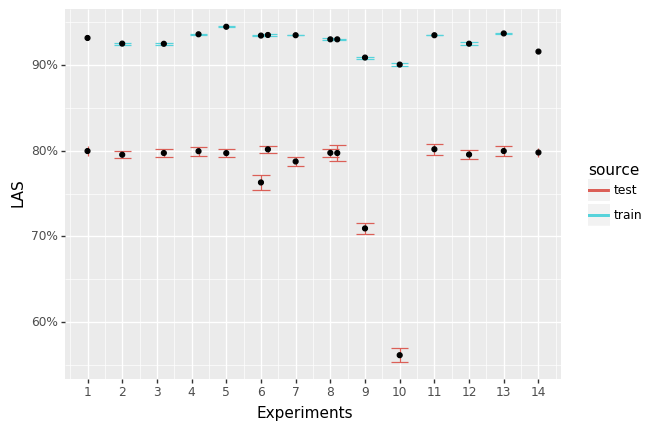

<ggplot: (-9223371853145080779)>

In [32]:
p = ggplot(sdf.loc[(sdf['model']=='malt') & (sdf['collection']=='est_ud') & (sdf['morph']=='am')]) 
p = p + geom_errorbar(aes(x = 'size_mean', ymin = 'accuracy_ue', ymax = 'accuracy_le', group='source',color='source'))
p = p + geom_point(aes(x='size_mean', y='accuracy_mean', group='source'))
p = p + scale_y_continuous(name='LAS', labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(name = 'Experiments', limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_malt_am_error.pdf")
p

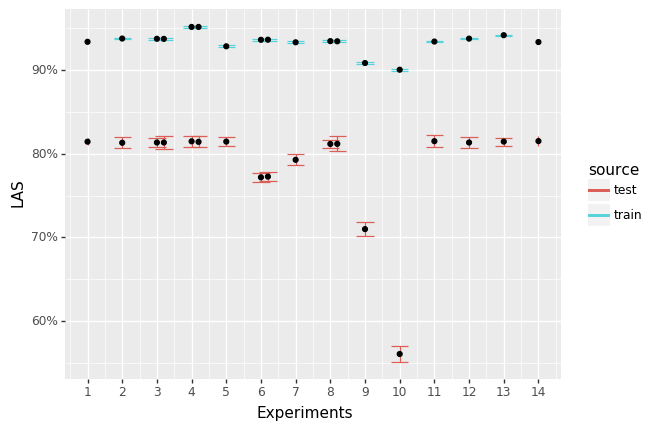

<ggplot: (-9223371853144482181)>

In [33]:
p = ggplot(sdf.loc[(sdf['model']=='malt') & (sdf['collection']=='est_ud') & (sdf['morph']=='gm')]) 
p = p + geom_errorbar(aes(x = 'size_mean', ymin = 'accuracy_ue', ymax = 'accuracy_le', group='source',color='source'))
p = p + geom_point(aes(x='size_mean', y='accuracy_mean', group='source'))
p = p + scale_y_continuous(name='LAS', labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(name = 'Experiments', limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_malt_gm_error.pdf")
p

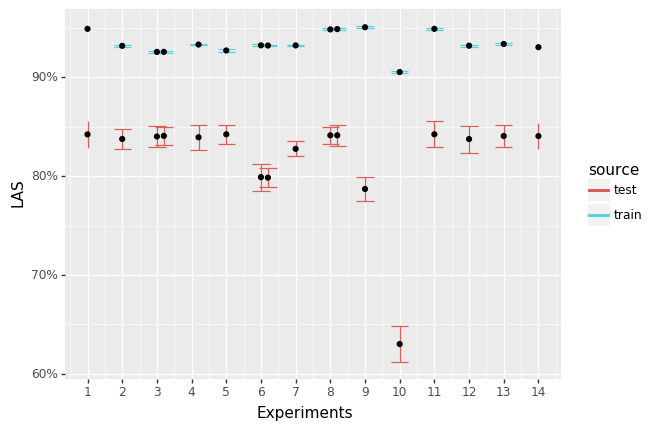

<ggplot: (183712279700)>

In [34]:
p = ggplot(sdf.loc[(sdf['model']=='malt') & (sdf['collection']=='edt') & (sdf['morph']=='am')]) 
p = p + geom_errorbar(aes(x = 'size_mean', ymin = 'accuracy_ue', ymax = 'accuracy_le', group='source',color='source'))
p = p + geom_point(aes(x='size_mean', y='accuracy_mean', group='source'))
p = p + scale_y_continuous(name='LAS', labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(name = 'Experiments', limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_malt_am_error.pdf")
p

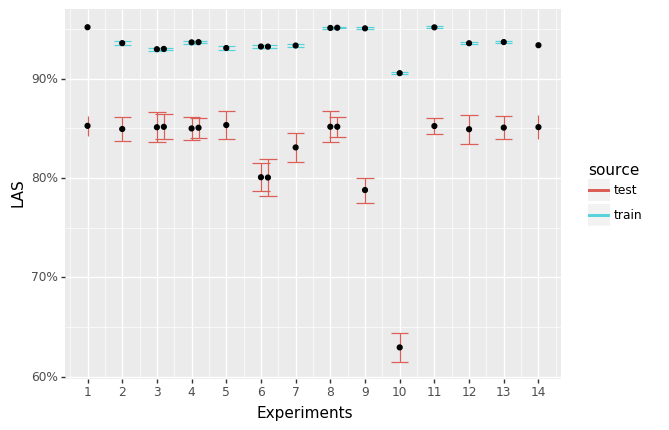

<ggplot: (-9223371853142637550)>

In [35]:
p = ggplot(sdf.loc[(sdf['model']=='malt') & (sdf['collection']=='edt') & (sdf['morph']=='gm')]) 
p = p + geom_errorbar(aes(x = 'size_mean', ymin = 'accuracy_ue', ymax = 'accuracy_le', group='source',color='source'))
p = p + geom_point(aes(x='size_mean', y='accuracy_mean', group='source'))
p = p + scale_y_continuous(name='LAS', labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(name = 'Experiments', limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_malt_gm_error.pdf")
p

LAS, UAS, LA scores for all the splits

In [50]:
df = pd.read_csv("scores_1.csv")
df.head()

,Unnamed: 0,collection,morph,experiment,model,type,score
0,0,est_ud,gm,2,malt,LAS,0.849123
1,1,est_ud,gm,2,malt,UAS,0.877164
2,2,est_ud,gm,2,malt,LA,0.909616
3,3,est_ud,gm,3,malt,LAS,0.851686
4,4,est_ud,gm,3,malt,UAS,0.878856


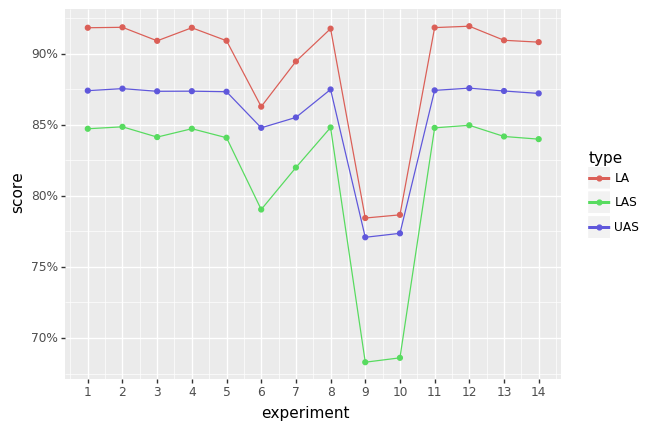

<ggplot: (-9223371853142637417)>

In [55]:
df_um = df.loc[(df['model']=='udpipe') & (df['collection']=='edt') & (df['morph']=='am')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'score', color='type'))
p = p + geom_line(aes(x='experiment', y = 'score', color='type'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_udpipe_am_all.pdf")

display(p)

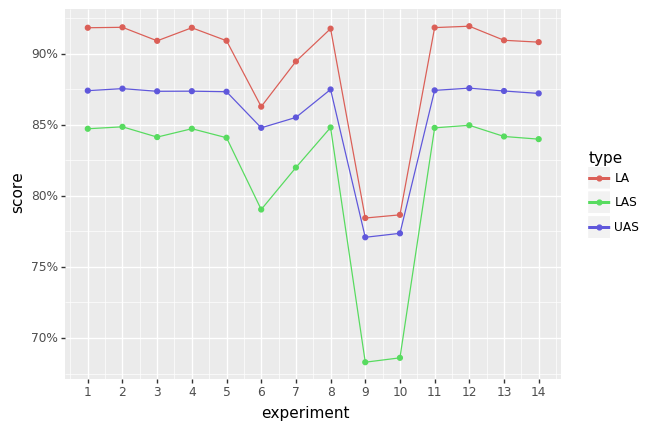

<ggplot: (-9223371853142807699)>

In [56]:
df_um = df.loc[(df['model']=='udpipe') & (df['collection']=='edt') & (df['morph']=='gm')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'score', color='type'))
p = p + geom_line(aes(x='experiment', y = 'score', color='type'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_udpipe_gm_all.pdf")

display(p)

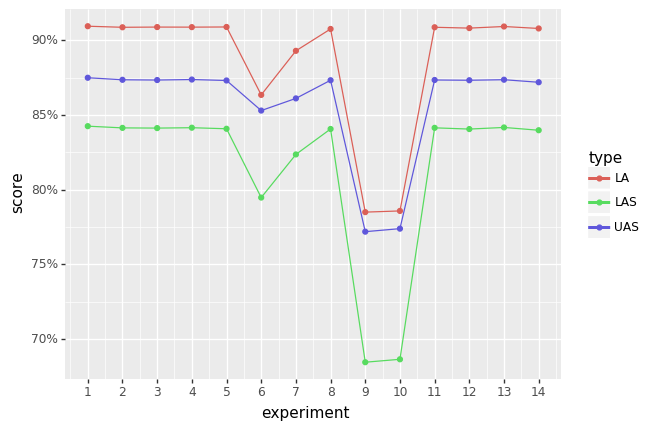

<ggplot: (-9223371853142656610)>

In [57]:
df_um = df.loc[(df['model']=='udpipe') & (df['collection']=='est_ud') & (df['morph']=='am')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'score', color='type'))
p = p + geom_line(aes(x='experiment', y = 'score', color='type'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_udpipe_am_all.pdf")

display(p)

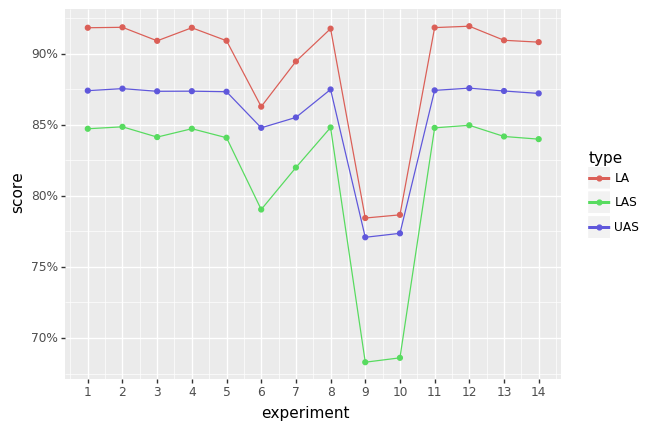

<ggplot: (183710400418)>

In [58]:
df_um = df.loc[(df['model']=='udpipe') & (df['collection']=='est_ud') & (df['morph']=='gm')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'score', color='type'))
p = p + geom_line(aes(x='experiment', y = 'score', color='type'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_udpipe_gm_all.pdf")

display(p)

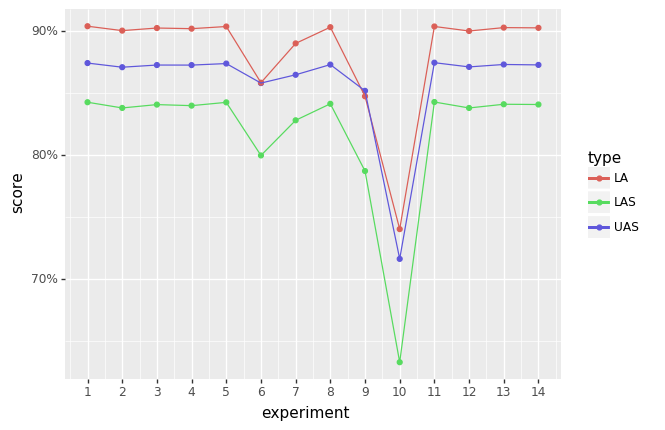

<ggplot: (183710162247)>

In [59]:
df_um = df.loc[(df['model']=='malt') & (df['collection']=='edt') & (df['morph']=='am')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'score', color='type'))
p = p + geom_line(aes(x='experiment', y = 'score', color='type'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_malt_am_all.pdf")

display(p)

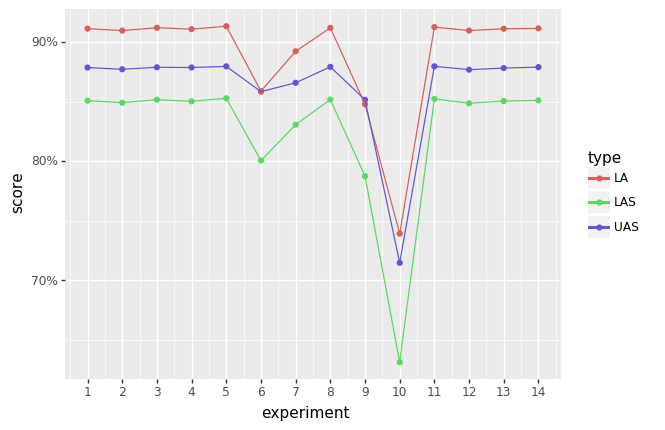

<ggplot: (-9223371853142835803)>

In [60]:
df_um = df.loc[(df['model']=='malt') & (df['collection']=='edt') & (df['morph']=='gm')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'score', color='type'))
p = p + geom_line(aes(x='experiment', y = 'score', color='type'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("edt_malt_gm_all.pdf")

display(p)

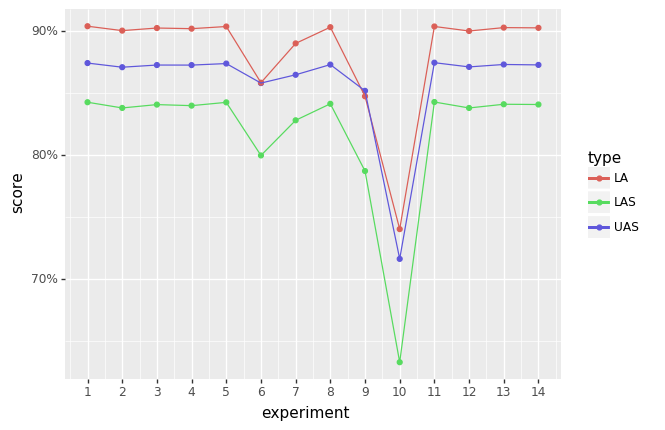

<ggplot: (-9223371853144481897)>

In [61]:
df_um = df.loc[(df['model']=='malt') & (df['collection']=='est_ud') & (df['morph']=='am')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'score', color='type'))
p = p + geom_line(aes(x='experiment', y = 'score', color='type'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_malt_am_all.pdf")

display(p)

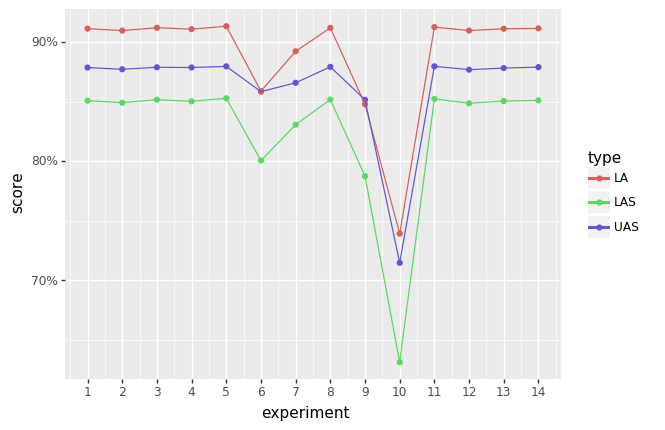

<ggplot: (183712125781)>

In [62]:
df_um = df.loc[(df['model']=='malt') & (df['collection']=='est_ud') & (df['morph']=='gm')]
p = ggplot(df_um)
p = p + geom_point(aes(x='experiment', y = 'score', color='type'))
p = p + geom_line(aes(x='experiment', y = 'score', color='type'))
#p = p +  theme(axis_text_x  = element_text(angle = 90, hjust = 1))
p = p + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
p = p +  scale_x_continuous(limits=(1, 14),
                         breaks=range(1, 15, 1))
p.save("est_ud_malt_gm_all.pdf")

display(p)